In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Snippet for the use of relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from src.data.make_dataset import X_raw, Y

In [3]:
seed = 42
np.random.seed(seed)
rnd.seed(seed)

# Deep Learning

## Multilayer Perceptron (MLP)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, Y, test_size=0.2, shuffle=True, random_state=seed)

In [5]:
# Preprocessing
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

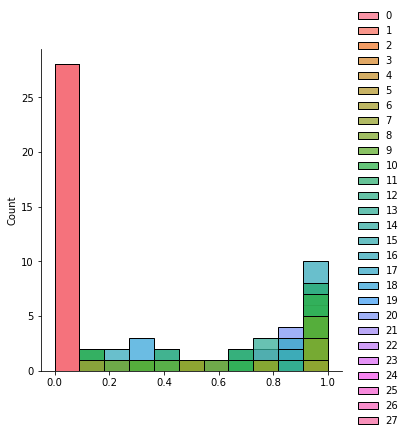

In [6]:
sns.displot(np.array(X_train)[0])

In [75]:
# Model Building
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10))

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

=======================] - 4s 77us/sample - loss: 0.0748 - accuracy: 0.9780 - val_loss: 0.2294 - val_accuracy: 0.9454
Epoch 70/200
56000/56000 [==============================] - 4s 76us/sample - loss: 0.0749 - accuracy: 0.9775 - val_loss: 0.2292 - val_accuracy: 0.9458
Epoch 71/200
56000/56000 [==============================] - 4s 78us/sample - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.2360 - val_accuracy: 0.9452
Epoch 72/200
56000/56000 [==============================] - 4s 76us/sample - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.2285 - val_accuracy: 0.9475
Epoch 73/200
56000/56000 [==============================] - 4s 76us/sample - loss: 0.0734 - accuracy: 0.9776 - val_loss: 0.2368 - val_accuracy: 0.9476
Epoch 74/200
56000/56000 [==============================] - 4s 76us/sample - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.2301 - val_accuracy: 0.9476
Epoch 75/200
56000/56000 [==============================] - 4s 78us/sample - loss: 0.0714 - accuracy: 0.9786 - val_loss: 0.2353

In [79]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.2f}')

14000/1 - 0s - loss: 0.6229 - accuracy: 0.9361
Test accuracy : 0.94


### Plotting the model's accuracy and loss throughout the training

Important step to detect overfitting/underfitting or other common issues

In [91]:
def plot_model_results(hist):

    plt.figure(figsize=(10,5))

    # Accuracy History
    plt.subplot(121)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # Loss History
    plt.subplot(122)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

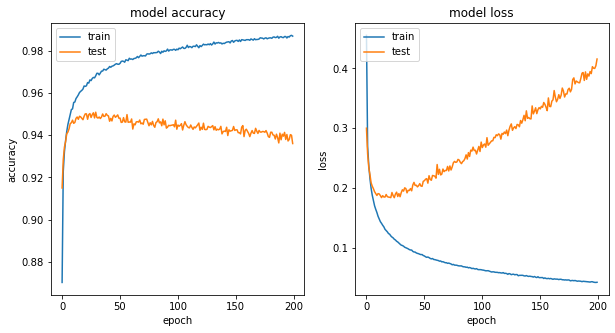

In [92]:
plot_model_results(history)

Our model overfits ! We do not need to train it for so long, we can drastically reduce the number of epochs

Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 5s 85us/sample - loss: 0.3827 - accuracy: 0.8941 - val_loss: 0.2655 - val_accuracy: 0.9246
Epoch 2/20
56000/56000 [==============================] - 4s 75us/sample - loss: 0.2286 - accuracy: 0.9352 - val_loss: 0.2129 - val_accuracy: 0.9401
Epoch 3/20
56000/56000 [==============================] - 4s 80us/sample - loss: 0.1875 - accuracy: 0.9460 - val_loss: 0.1908 - val_accuracy: 0.9451
Epoch 4/20
56000/56000 [==============================] - 5s 82us/sample - loss: 0.1590 - accuracy: 0.9540 - val_loss: 0.1705 - val_accuracy: 0.9500
Epoch 5/20
56000/56000 [==============================] - 5s 83us/sample - loss: 0.1368 - accuracy: 0.9600 - val_loss: 0.1615 - val_accuracy: 0.9549
Epoch 6/20
56000/56000 [==============================] - 5s 81us/sample - loss: 0.1223 - accuracy: 0.9639 - val_loss: 0.1548 - val_accuracy: 0.9543
Epoch 7/20
56000/56000 [==============================] 

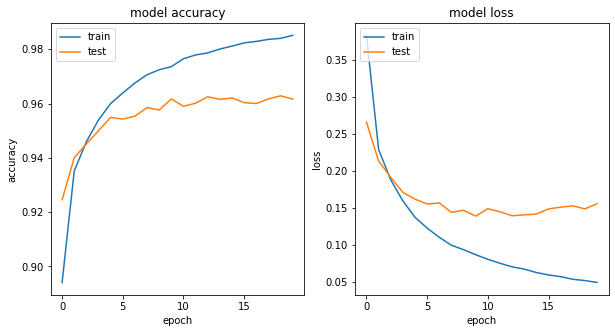

In [96]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(30, activation='relu')) # Add 15 more hidden units to the hidden layer
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.2f}')

plot_model_results(history)

Finally, let's try out a way more complex neural network

In [99]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)             

Train on 56000 samples, validate on 14000 samples
Epoch 1/50
56000/56000 [==============================] - 27s 477us/sample - loss: 0.3744 - accuracy: 0.8846 - val_loss: 0.1449 - val_accuracy: 0.9601
Epoch 2/50
56000/56000 [==============================] - 21s 378us/sample - loss: 0.2072 - accuracy: 0.9414 - val_loss: 0.1228 - val_accuracy: 0.9651
Epoch 3/50
56000/56000 [==============================] - 22s 389us/sample - loss: 0.1798 - accuracy: 0.9492 - val_loss: 0.1149 - val_accuracy: 0.9681
Epoch 4/50
56000/56000 [==============================] - 21s 377us/sample - loss: 0.1608 - accuracy: 0.9547 - val_loss: 0.1120 - val_accuracy: 0.9687
Epoch 5/50
56000/56000 [==============================] - 21s 378us/sample - loss: 0.1535 - accuracy: 0.9572 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 6/50
56000/56000 [==============================] - 21s 377us/sample - loss: 0.1414 - accuracy: 0.9615 - val_loss: 0.0995 - val_accuracy: 0.9743
Epoch 7/50
56000/56000 [====================

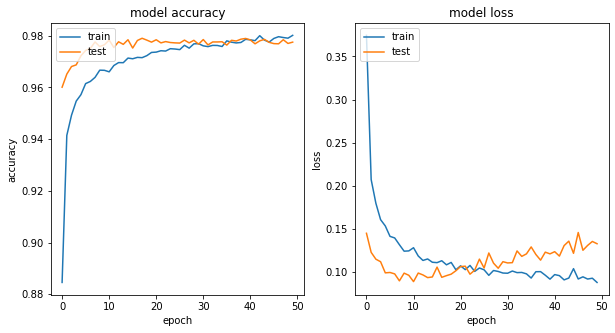

In [100]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.2f}')

plot_model_results(history)

### Training our model with different batch sizes (1, 32, 128, 1024)

In [22]:
def fit_model(n_batch=32):

    print(f'Training the model with a batch size of {n_batch}')
    
    # Simple 1 layer neural network for time & study sake
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=n_batch, verbose=0)

    # Plot Learning Curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f'Batch size : {n_batch}')

Training the model with a batch size of 4
Training the model with a batch size of 16
Training the model with a batch size of 32
Training the model with a batch size of 128
Training the model with a batch size of 256
Training the model with a batch size of 512


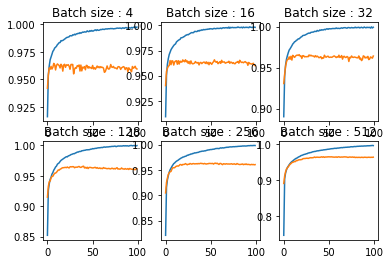

In [23]:
batch_sizes = [4, 16, 32, 128, 256, 512]
plt.figure(figsize=(15, 10))

for i, batch_size in enumerate(batch_sizes):
    plt.subplot(230 + (i+1))
    fit_model(n_batch=batch_size)
